In [39]:
import pandas as pd
from prophet import Prophet
import numpy as np
import random

In [16]:
start_date = '2021-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df = pd.DataFrame({'ds': date_range, 'y': 0})

# Create a column for the month and day
df['year'] = df['ds'].dt.year
df['month'] = df['ds'].dt.month
df['day'] = df['ds'].dt.day

for i, row in df.iterrows():
    if row['day'] == 1:
        iday = 23 + np.random.binomial(4, 0.5)
    
    if row['day'] == iday:
        df.loc[i, 'y'] = 1

df = df.drop(['year','month', 'day'], axis=1)

# Format the ds column as yyyy-mm-dd
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')



In [33]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
m.fit(df)

14:21:27 - cmdstanpy - INFO - Chain [1] start processing
14:21:28 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1090,2023-12-27
1091,2023-12-28
1092,2023-12-29
1093,2023-12-30
1094,2023-12-31


In [35]:
forecast = m.predict(future)

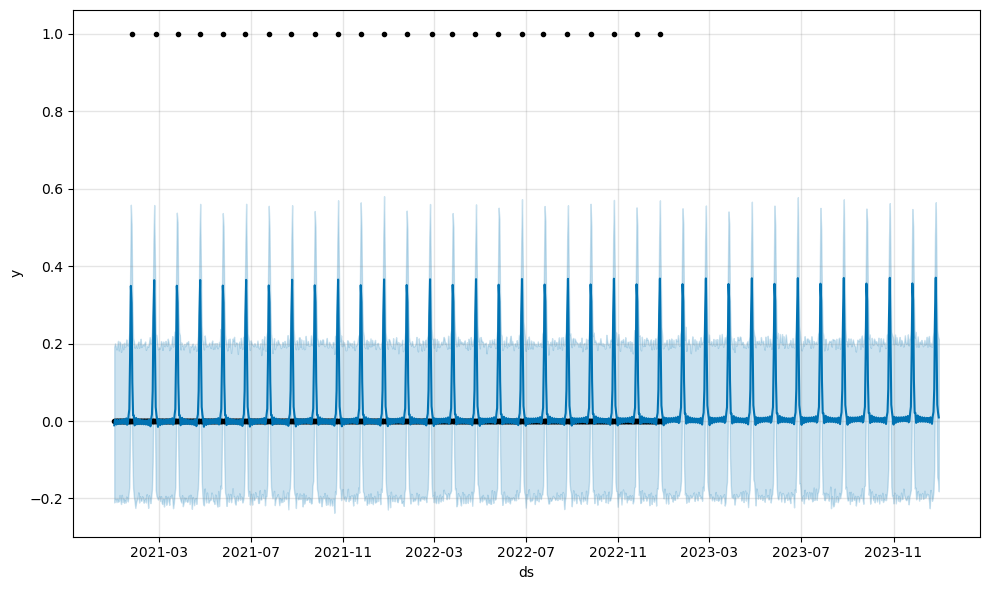

In [36]:
fig1 = m.plot(forecast)

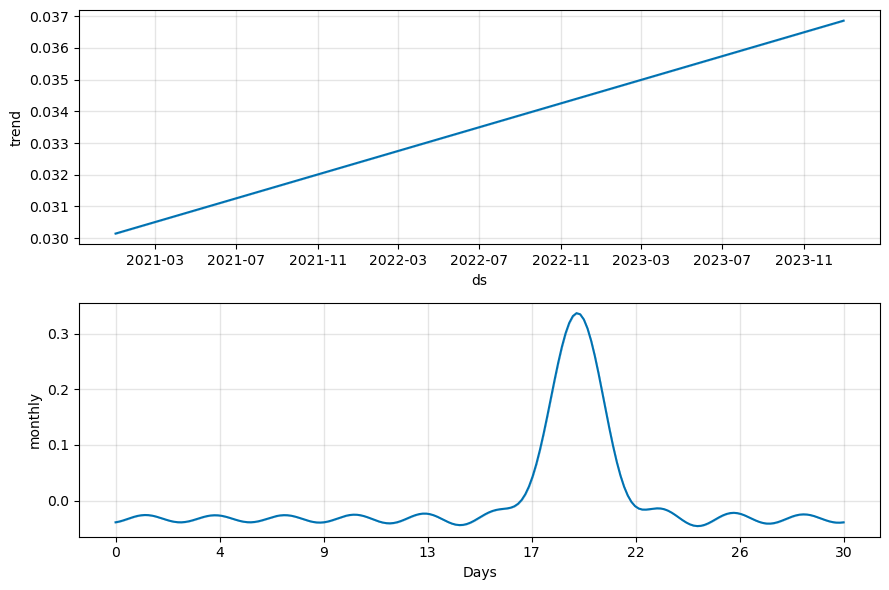

In [37]:
fig2 = m.plot_components(forecast)

# 10K AED every 3-5 months

In [58]:
start_date = '2021-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df = pd.DataFrame({'ds': date_range, 'y': 0})

# Create a column for the month and day
df['year'] = df['ds'].dt.year
df['month'] = df['ds'].dt.month
df['day'] = df['ds'].dt.day

#set a top limit for while loop
top = len(df)
#set while loop condition
con = 0
#set day of event at 0
d = 0
while con == 0:
    #we randomly choose one day between 62 and 153 using normal distribution
    rd = np.random.normal(loc=107, scale=16, size=1)[0]
    rd = np.round(rd)
    rd = np.clip(rd, 62, 153)

    #add random days to last day of event
    d = d + rd
    #if new day is within range, set y of said day to 10000; otherwise, end loop
    if d < top:
        df['y'][d]=10000
    else:
        con = 1

df = df.drop(['year','month', 'day'], axis=1)

# Format the ds column as yyyy-mm-dd
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')

df[df['y']>0]

/var/folders/_f/fyj5g6rn3s74bjqhs95txbk40000gn/T/ipykernel_47112/735190264.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][d]=10000


,ds,y
99,2021-04-10,10000
234,2021-08-23,10000
357,2021-12-24,10000
448,2022-03-25,10000
549,2022-07-04,10000
656,2022-10-19,10000


21:08:50 - cmdstanpy - INFO - Chain [1] start processing
21:08:50 - cmdstanpy - INFO - Chain [1] done processing


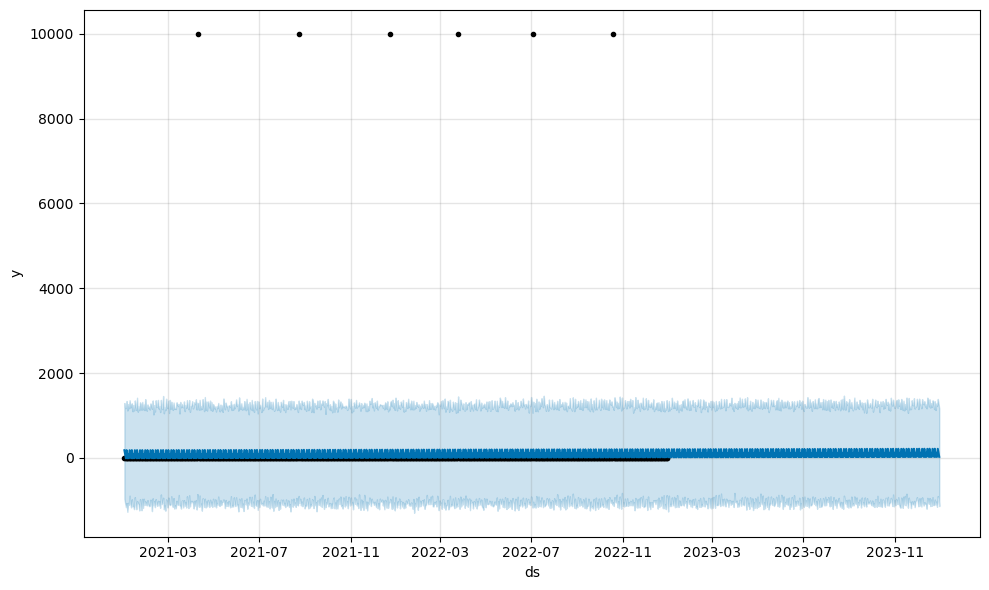

In [62]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)

Normal model is not doing so well. We will try to remove all 0 values

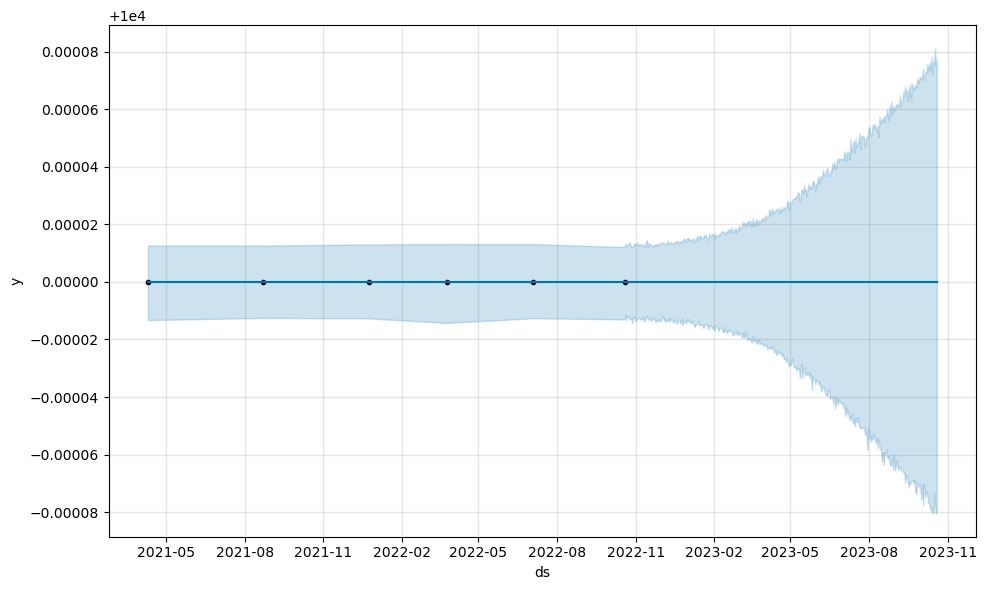

In [63]:
df = df[df['y'] != 0]
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)

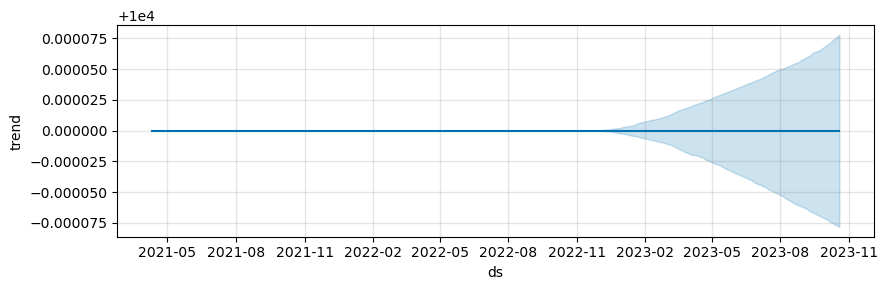

In [65]:
fig2 = m.plot_components(forecast)

Results are abysmal. We will try now changing df into 01-mm-yyyy

In [68]:
start_date = '2021-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df = pd.DataFrame({'ds': date_range, 'y': 0})

# Create a column for the month and day
df['year'] = df['ds'].dt.year
df['month'] = df['ds'].dt.month
df['day'] = df['ds'].dt.day

#set a top limit for while loop
top = len(df)
#set while loop condition
con = 0
#set day of event at 0
d = 0
while con == 0:
    #we randomly choose one day between 62 and 153 using normal distribution
    rd = np.random.normal(loc=107, scale=16, size=1)[0]
    rd = np.round(rd)
    rd = np.clip(rd, 62, 153)

    #add random days to last day of event
    d = d + rd
    #if new day is within range, set y of said day to 10000; otherwise, end loop
    if d < top:
        df['y'][d]=10000
    else:
        con = 1

df = df.drop(['day'], axis=1)

monthly_sum = df.groupby(['year', 'month'])['y'].sum()

# Reset the index and create a new ds column
monthly_sum = monthly_sum.reset_index()
monthly_sum['ds'] = monthly_sum.apply(lambda x: pd.to_datetime(f"{x['year']}-{x['month']}-01"), axis=1)

# Select only the ds and y columns
df = monthly_sum[['ds', 'y']]


/var/folders/_f/fyj5g6rn3s74bjqhs95txbk40000gn/T/ipykernel_47112/2657749548.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][d]=10000


,ds,y
0,2021-01-01,0
1,2021-02-01,0
2,2021-03-01,0
3,2021-04-01,10000
4,2021-05-01,0
5,2021-06-01,0
6,2021-07-01,0
7,2021-08-01,10000
8,2021-09-01,0
9,2021-10-01,0


21:37:22 - cmdstanpy - INFO - Chain [1] start processing
21:37:22 - cmdstanpy - INFO - Chain [1] done processing


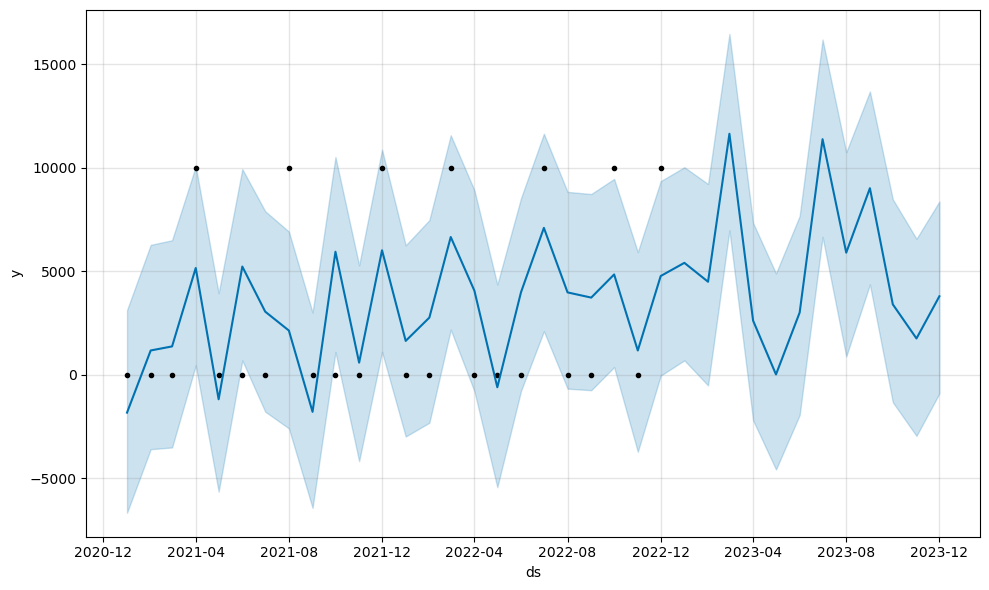

In [87]:
m = Prophet()
m.add_seasonality(name='semi_annually', period=30.5*6, fourier_order=5)
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
fig1 = m.plot(forecast)

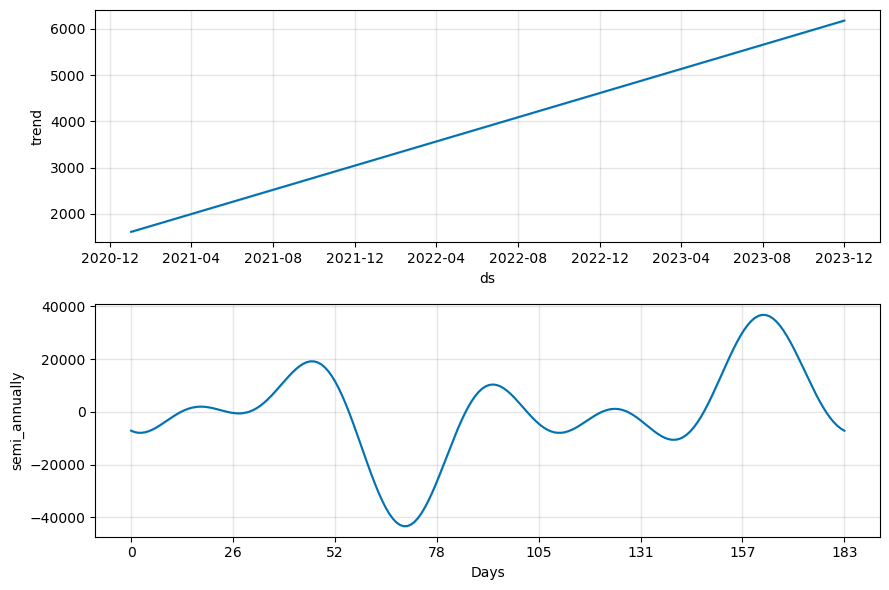

In [88]:
fig2 = m.plot_components(forecast)

Periods are random; causing chaos.

# Small amounts every few weeks

In [116]:
start_date = '2021-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df = pd.DataFrame({'ds': date_range, 'y': 0})

# Create a column for the month and day
df['year'] = df['ds'].dt.year
df['month'] = df['ds'].dt.month
df['day'] = df['ds'].dt.day

#set a top limit for while loop
top = len(df)
#set while loop condition
con = 0
#set day of event at 0
d = 0
while con == 0:
    #we randomly choose one day between 14 and 28 using normal distribution
    rd = np.random.normal(loc=21, scale=4, size=1)[0]
    rd = np.round(rd)
    rd = np.clip(rd, 14, 28)

    #add random days to last day of event
    d = d + rd
    #if new day is within range, set y of said day to around 1000; otherwise, end loop
    if d < top:
        df['y'][d]=1000 + np.random.normal(loc=100, scale=50, size=1)[0]
    else:
        con = 1

df = df.drop(['year','month', 'day'], axis=1)

# Format the ds column as yyyy-mm-dd
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')

df[df['y']>0]

/var/folders/_f/fyj5g6rn3s74bjqhs95txbk40000gn/T/ipykernel_47112/3826179123.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][d]=1000 + np.random.normal(loc=100, scale=50, size=1)[0]


,ds,y
19,2021-01-20,1051.061920
38,2021-02-08,1032.403966
53,2021-02-23,1092.569964
73,2021-03-15,1221.287566
95,2021-04-06,1118.425848
114,2021-04-25,1146.764705
134,2021-05-15,1129.577824
152,2021-06-02,1097.563689
178,2021-06-28,1020.945883
192,2021-07-12,1091.837397


22:05:40 - cmdstanpy - INFO - Chain [1] start processing
22:05:41 - cmdstanpy - INFO - Chain [1] done processing


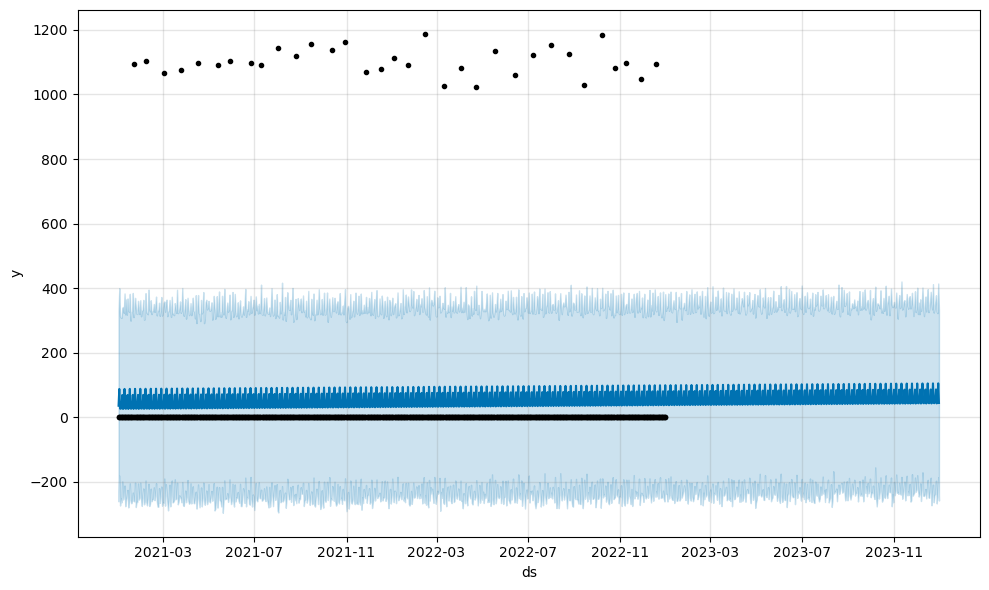

In [101]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)

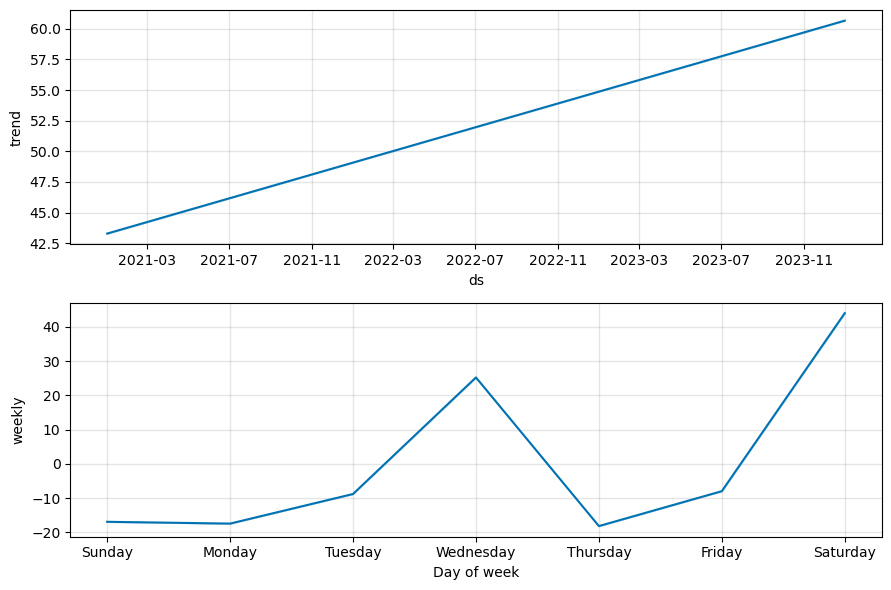

In [102]:
fig2 = m.plot_components(forecast)

Weekly seems like a bad idea. I will add a 9 week period instead

22:06:00 - cmdstanpy - INFO - Chain [1] start processing
22:06:00 - cmdstanpy - INFO - Chain [1] done processing


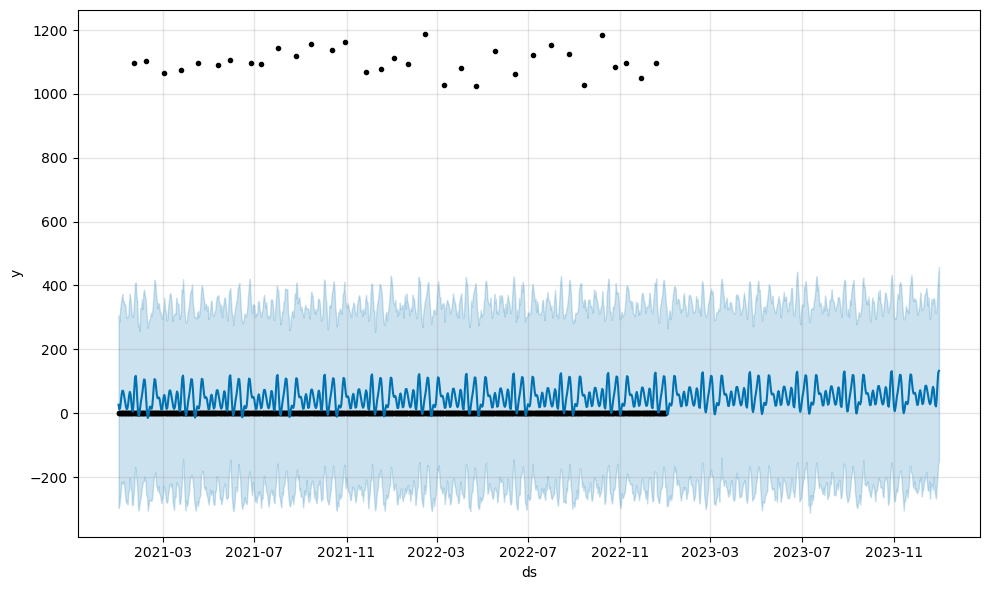

In [103]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='9_weeks', period=7*9, fourier_order=10)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)

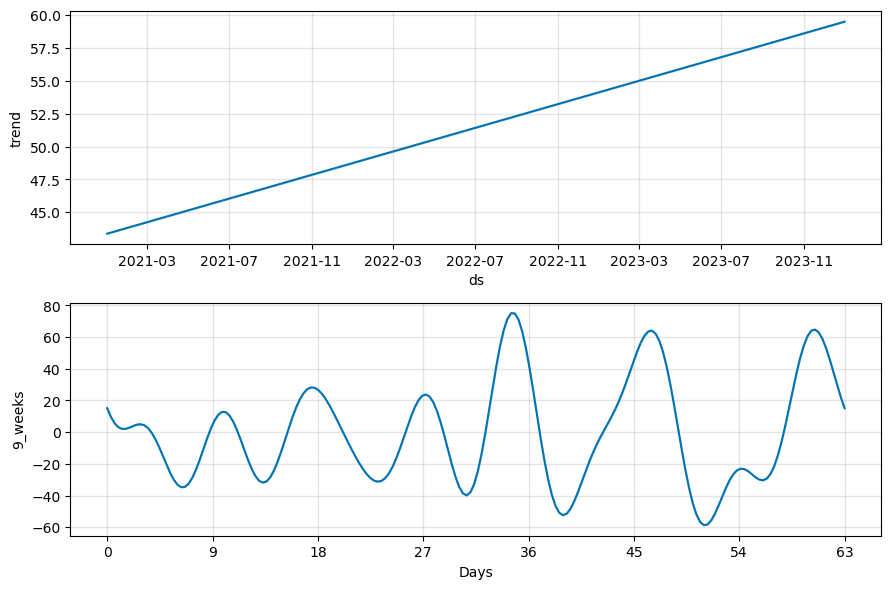

In [104]:
fig2 = m.plot_components(forecast)

In [105]:
df['ds']

0      2021-01-01
1      2021-01-02
2      2021-01-03
3      2021-01-04
4      2021-01-05
          ...    
725    2022-12-27
726    2022-12-28
727    2022-12-29
728    2022-12-30
729    2022-12-31
Name: ds, Length: 730, dtype: object

In [117]:
df['ds'] = pd.to_datetime(df['ds'])

In [118]:
df = df.set_index('ds')

In [119]:
weekly_sum = df.resample('W')['y'].sum()

In [120]:
# Reset the index of the weekly_sum DataFrame
weekly_sum = weekly_sum.reset_index()

# Print the resulting weekly sum DataFrame
print(weekly_sum)

            ds            y
0   2021-01-03     0.000000
1   2021-01-10     0.000000
2   2021-01-17     0.000000
3   2021-01-24  1051.061920
4   2021-01-31     0.000000
..         ...          ...
100 2022-12-04     0.000000
101 2022-12-11     0.000000
102 2022-12-18     0.000000
103 2022-12-25  1030.634284
104 2023-01-01     0.000000

[105 rows x 2 columns]


23:32:50 - cmdstanpy - INFO - Chain [1] start processing
23:32:50 - cmdstanpy - INFO - Chain [1] done processing


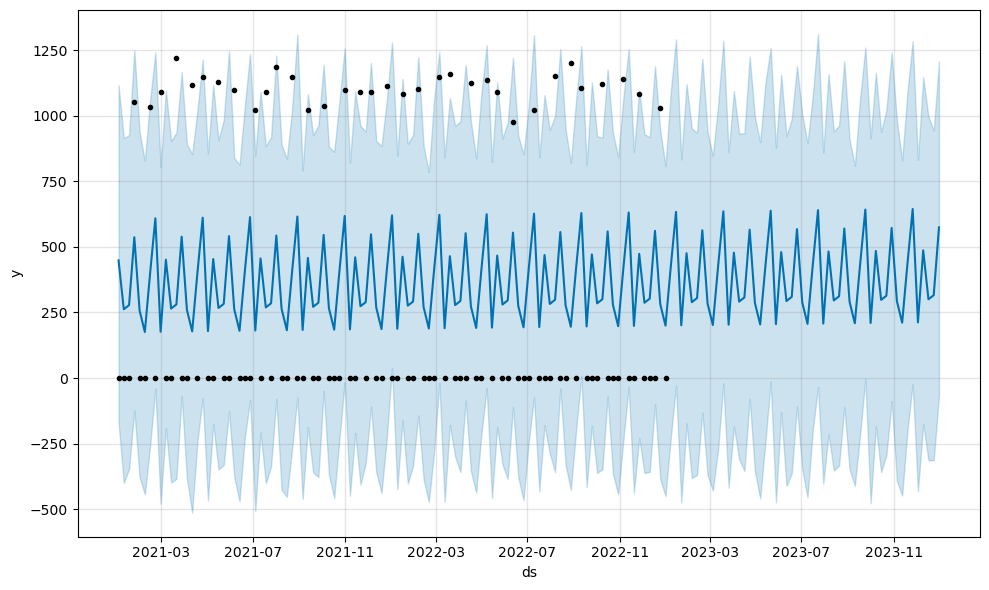

In [123]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='9_weeks', period=7*9, fourier_order=10)
m.fit(weekly_sum)
future = m.make_future_dataframe(periods=52, freq = 'W')
forecast = m.predict(future)
fig1 = m.plot(forecast)

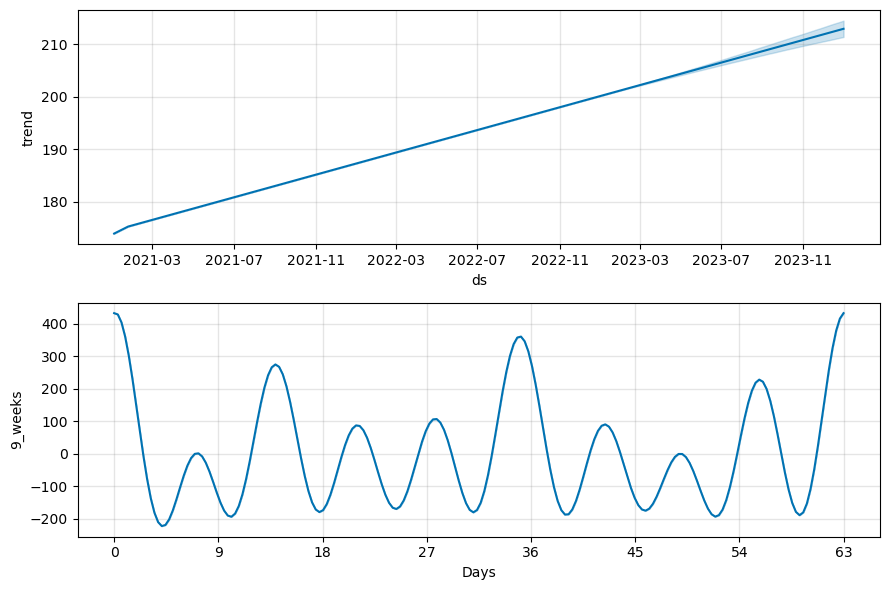

In [124]:
fig2 = m.plot_components(forecast)

Well...

# Two large amounts each year for the past 3 years

Assume 6 months interval

In [129]:
start_date = '2019-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='M')
df = pd.DataFrame({'ds': date_range, 'y': 0})

# Create a column for the month and day
df['year'] = df['ds'].dt.year
df['month'] = df['ds'].dt.month

# Set the y value to 1000000 for months 6 and 12
df.loc[(df['month'] == 6) | (df['month'] == 12), 'y'] = np.random.normal(loc=1000000, scale=300000, size=8)

df = df.drop(['year','month'], axis=1)

# Format the ds column as yyyy-mm-dd
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')

df[df['y']>0]

,ds,y
5,2019-06-30,8.409857e+05
11,2019-12-31,5.352223e+05
17,2020-06-30,1.038847e+06
23,2020-12-31,4.816242e+05
29,2021-06-30,1.157126e+06
35,2021-12-31,8.094493e+05
41,2022-06-30,1.022506e+06
47,2022-12-31,5.207320e+05


23:48:48 - cmdstanpy - INFO - Chain [1] start processing
23:48:49 - cmdstanpy - INFO - Chain [1] done processing


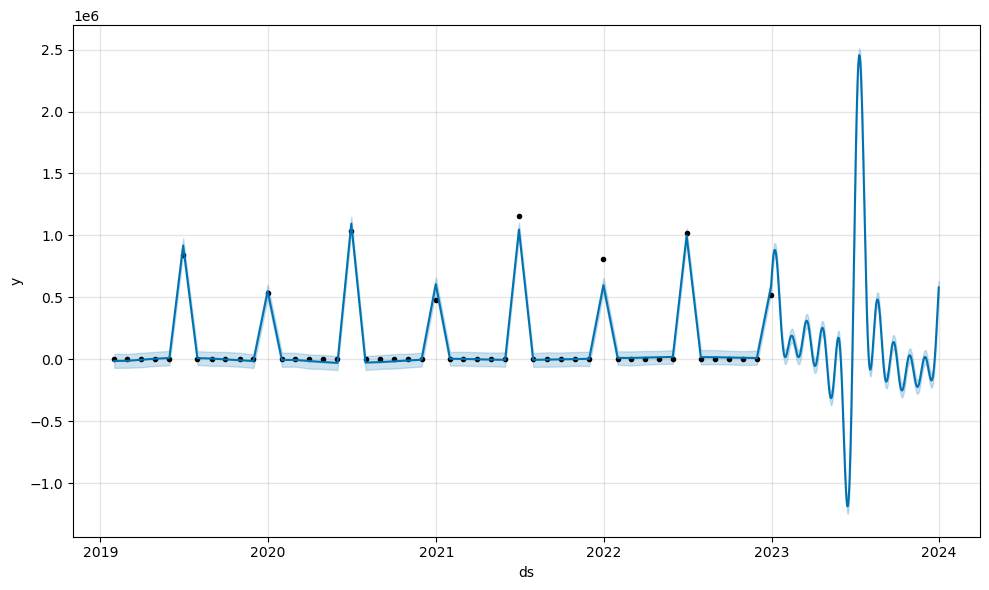

In [130]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)

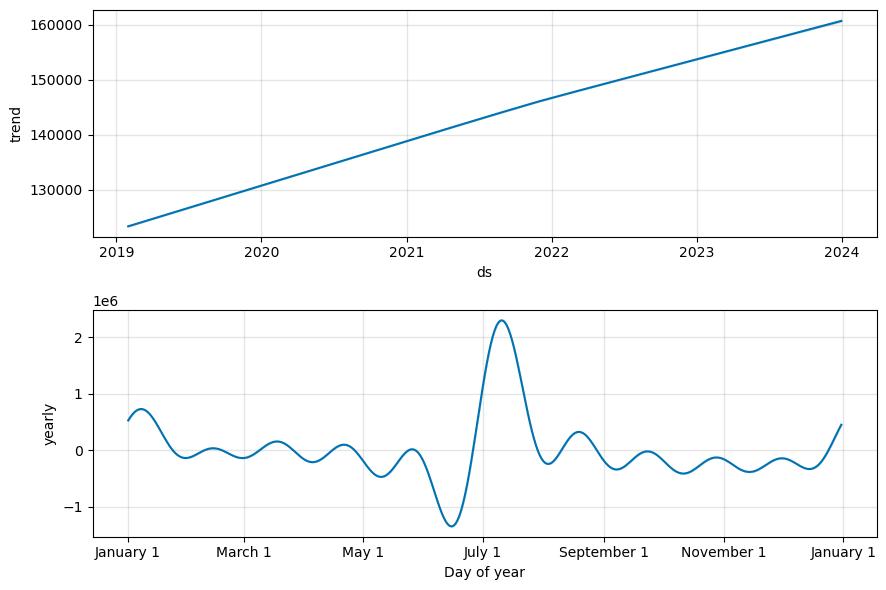

In [131]:
fig2 = m.plot_components(forecast)

Seems like cutoff makes a problem, and fourier needs more. We will try to do biannual period and more fourier.

23:53:03 - cmdstanpy - INFO - Chain [1] start processing
23:53:03 - cmdstanpy - INFO - Chain [1] done processing


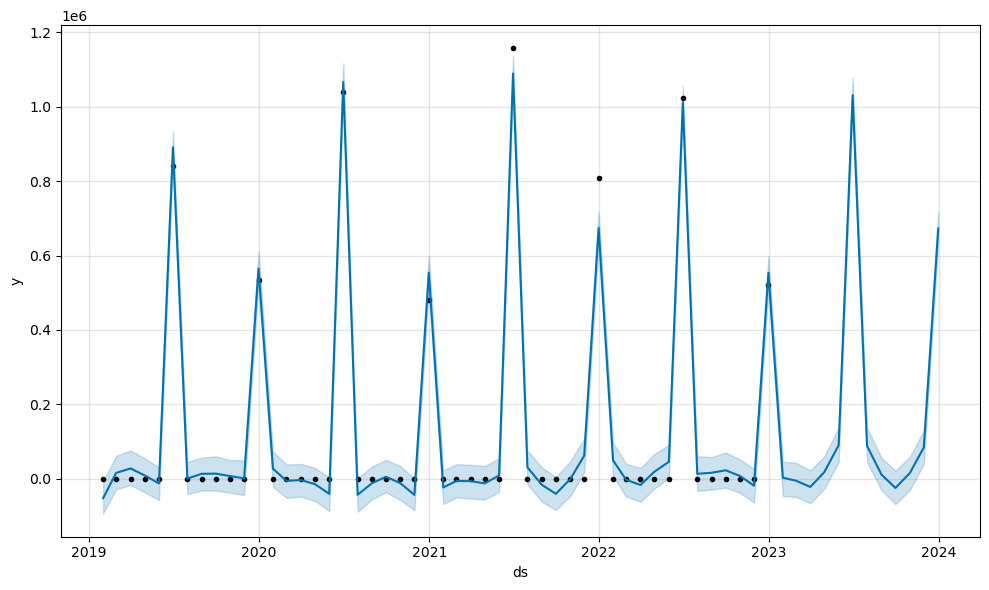

In [133]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='biannual', period=365*2, fourier_order=5)
m.fit(df)
future = m.make_future_dataframe(periods=12, freq = 'M')
forecast = m.predict(future)
fig1 = m.plot(forecast)

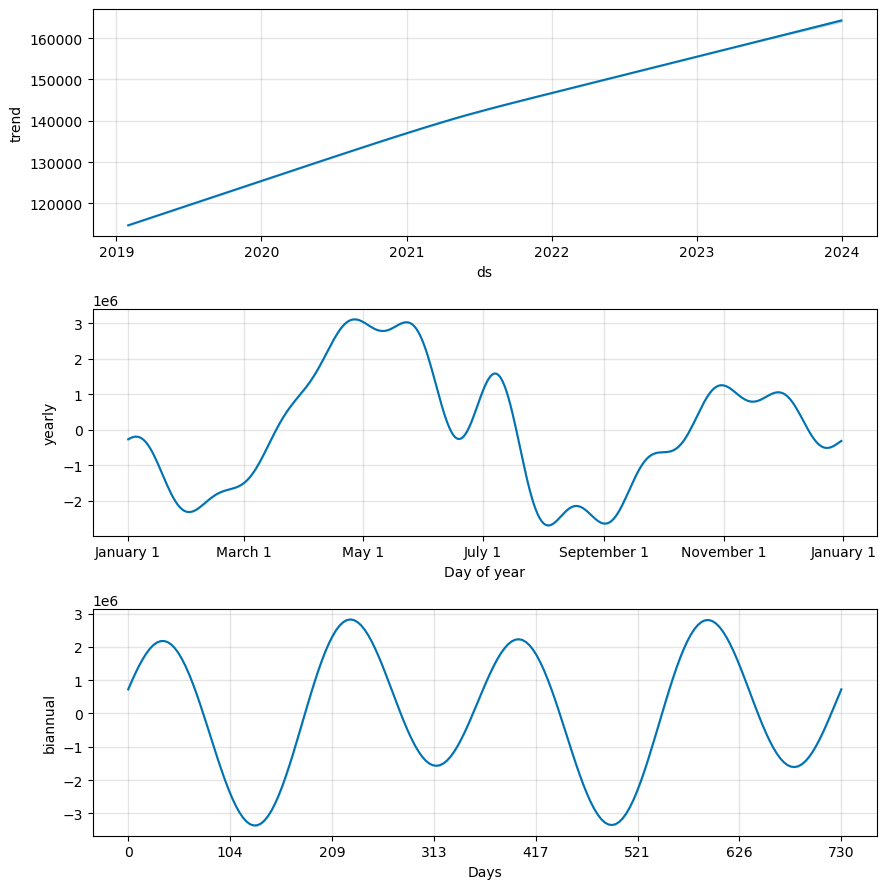

In [134]:
fig2 = m.plot_components(forecast)

23:54:19 - cmdstanpy - INFO - Chain [1] start processing
23:54:19 - cmdstanpy - INFO - Chain [1] done processing


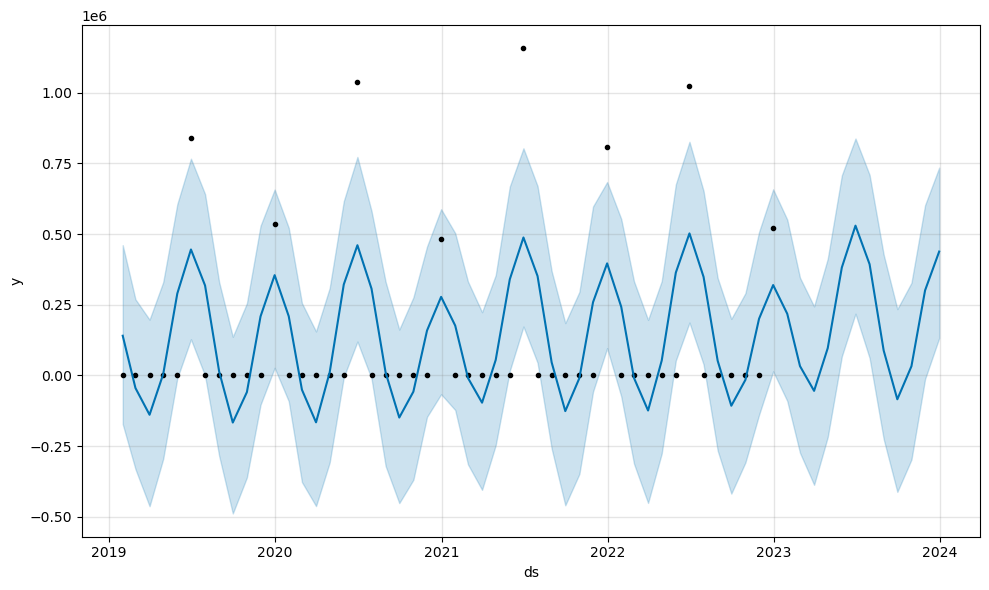

In [137]:
m = Prophet(yearly_seasonality=False)
m.add_seasonality(name='biannual', period=365*2, fourier_order=5)
m.fit(df)
future = m.make_future_dataframe(periods=12, freq = 'M')
forecast = m.predict(future)
fig1 = m.plot(forecast)

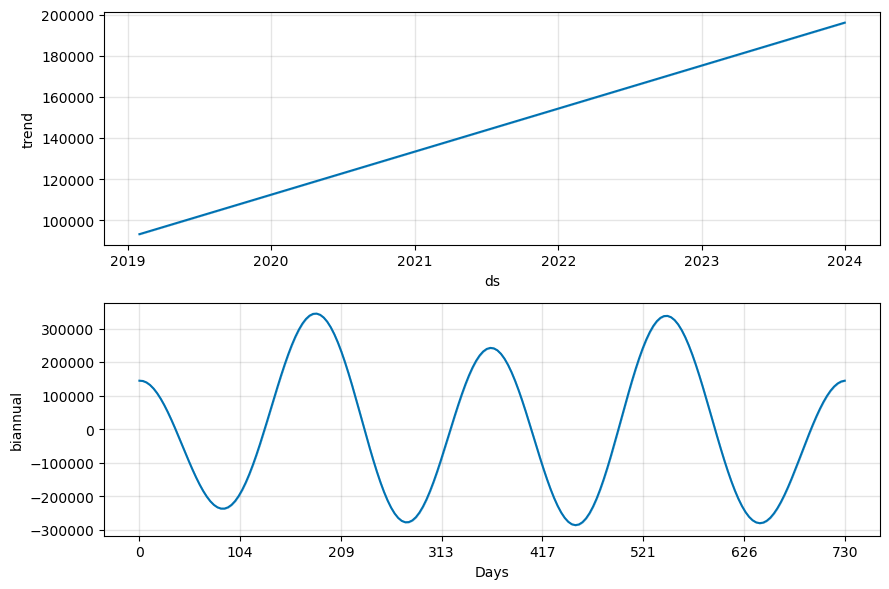

In [138]:
fig2 = m.plot_components(forecast)